In [141]:
import utilities.utils
from utilities.etl import IndeedETL
import pandas as pd
from utilities.utils import to_wcdf
import pandas as pd
from pandas_profiling import ProfileReport

data = pd.read_csv(IndeedETL().paths['preprocessed_merged_with_headings'], index_col=0)
data

,ID,Heading Text,Heading Title,Frequency,Person/Job/Org/None
0,0,unique opportunity collaborate diverse team te...,position summary,56,Job
1,43,looking full time data scientist work one area...,position summary,56,Job
2,157,senior data analyst responsible analyzing medi...,position summary,56,Job
3,176,role working team designing building testing n...,position summary,56,Job
4,183,senior data analyst responsible analyzing medi...,position summary,56,Job
...,...,...,...,...,...
7158,1649,employment type full time,job wealth management,2,Job
7159,1691,organization wm national sales marketing hr,job wealth management,2,Job
7187,1671,bachelor degree business admin management info...,education and experience required,2,Person
7188,1690,must masters bachelors degree computer science...,education and experience required,2,Person


In [142]:
IndeedETL().paths

{'heading': '../data/headings/heading_counts_clean.csv',
 'scraping': '/Users/mtaruno/Documents/DevZone/job-research/data/scraping_results/indeed/',
 'merged': '/Users/mtaruno/Documents/DevZone/job-research/data/merged_df.csv',
 'visualizations': '../visualizations',
 'merged_with_headings': '/Users/mtaruno/Documents/DevZone/job-research/data/headings/headings_df.csv',
 'preprocessed_merged_with_headings': '/Users/mtaruno/Documents/DevZone/job-research/data/preprocessed_merged_headings_df.csv'}

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5451 entries, 0 to 7196
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   5451 non-null   int64 
 1   Heading Text         5320 non-null   object
 2   Heading Title        5451 non-null   object
 3   Frequency            5451 non-null   int64 
 4   Person/Job/Org/None  5451 non-null   object
dtypes: int64(2), object(3)
memory usage: 255.5+ KB


In [144]:
profile = ProfileReport(data, title="Pandas Profiling Report")

In [145]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [146]:
# Inspecting my NaN rows

# getting index of nan rows
nan_indexes = data['Heading Text'][(data.isna()['Heading Text'] == True)].index

nan_indexes


Int64Index([ 203, 1570, 1689, 2395, 2420, 2423, 2457, 2460, 2461, 2465,
            ...
            4930, 4931, 4932, 4933, 4934, 4935, 4992, 5034, 5643, 6713],
           dtype='int64', length=131)

In [147]:
data.filter(nan_indexes, axis = 0)

,ID,Heading Text,Heading Title,Frequency,Person/Job/Org/None
203,1123,NaN,preferred qualifications,138,Person
1570,892,NaN,job duties,2,Job
1689,1123,NaN,required qualifications,50,Person
2395,86,NaN,qualifications,310,Person
2420,229,NaN,qualifications,310,Person
...,...,...,...,...,...
4935,1697,NaN,job id,111,None
4992,558,NaN,experience,42,Person
5034,1673,NaN,experience,42,Person
5643,1595,NaN,physical requirements,6,Job


In [148]:
# Pretty sure its safe to drop them
data = data.dropna()

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

def to_tfidf_df(corpus, ngram_range = (1,2)):
    vectorizer = TfidfVectorizer(ngram_range = ngram_range)
    X = vectorizer.fit_transform(corpus)
    return X, pd.DataFrame(columns = vectorizer.get_feature_names(), data = X.toarray())

In [150]:
X, tfidf_df = to_tfidf_df(data['Heading Text'], ngram_range = (1,2))

In [151]:
tfidf_df

,ab,ab test,abbott,abbott good,abi,abi product,abilities,abilities competencies,abilities excellent,abilities mathematical,...,zoom product,zs,zs careers,zs stakeholders,zsfg,zuckerberg,zuckerberg san,zynga,zynga provides,zynga stock
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [152]:
# Seeing words
tfidf_df.sum().sort_values()

homeless services        0.034376
standards best           0.034376
advisory committees      0.034376
request proposals        0.034376
met collect              0.034376
                          ...    
business                75.297494
science                 84.324998
degree                  86.561460
experience             104.253376
data                   148.675765
Length: 53312, dtype: float64

In [153]:
y = data['Person/Job/Org/None']

In [154]:
y.value_counts()

Job       2189
Person    1931
Org        753
None       447
Name: Person/Job/Org/None, dtype: int64

In [155]:
display(X),display(y)

<5320x53312 sparse matrix of type '<class 'numpy.float64'>'
	with 199922 stored elements in Compressed Sparse Row format>

0          Job
1          Job
2          Job
3          Job
4          Job
         ...  
7158       Job
7159       Job
7187    Person
7188    Person
7196    Person
Name: Person/Job/Org/None, Length: 5320, dtype: object

(None, None)

In [156]:
from sklearn import datasets
X_digits, y_digits = datasets.load_digits(return_X_y=True)
display(X_digits), display(y_digits)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

array([0, 1, 2, ..., 8, 9, 8])

(None, None)

In [157]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

class LogReg():
    def __init__(self, cv_folds = 5):
        ''' LR hyperparamaeter initializations'''
        self.C = np.logspace(-3,3,7)
        self.cv_folds = cv_folds,
        self.penalty = ["l2"]

    def train_test_split(self, X, y):
        # Focusing on the inbound text
        # Splitting, with stratify param for class balance
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, 
                                                            random_state = 25, stratify = y)
        return X_train, X_test, y_train, y_test
    
    def lr_pipeline(self, X_train, y_train):
        ''' Using the training data to train my Random Forest model '''
        # Initializing my pipeline
        estimators = [('model', LogisticRegression())]

        pipe = Pipeline(steps = estimators)

        # These are the hyperparamaters and models I want to tune
        param_grid = {'model': [LogisticRegression()], 
                    'model__C': self.C,
                      'model__penalty': self.penalty}
        # 5 fold cross validation
        search = GridSearchCV(pipe, param_grid, verbose = 3, n_jobs = -1)

        search.fit(X_train, y_train)
        
        print("Best parameter (CV score=%0.3f):" % search.best_score_)
        print(search.best_params_)
        
        return search
    
    
    def save_model(self, fitted_grid, save_directory_path: str):
        from sklearn.externals import joblib
        import datetime

        # getting string of now
        now = str(datetime.datetime.now())[:16]

        # Saving it because it took some time to run
        joblib.dump(fitted_grid, f'{save_directory_path}/lr_{now}.pkl', compress=1)
    
    def get_results(self, fitted_grid):
        ''' Here we have a dataframe of all the fits under the different hyperparamaters '''
        return pd.DataFrame(fitted_grid.cv_results_).sort_values('mean_test_score', ascending = False)

    def get_best_model(self, fitted_grid):
        ''' Here we get the best model from the grid '''
        return fitted_grid.best_estimator_
    
    def evaluate_model(self, X_train, y_train, X_test, y_test, fitted_grid):
        ''' Here we evaluate the model:
        Prints out the classification report and displays a confusion matrix.
         '''
        from sklearn.metrics import ConfusionMatrixDisplay
        from sklearn.metrics import classification_report
        from sklearn.metrics import f1_score
        from sklearn.metrics import confusion_matrix
        import matplotlib.pyplot as plt

        plt.style.use('default')

        # We use the best estimator of the grid for evaluatoin
        best_model = fitted_grid.best_estimator_[0]

            # Scoring the model
        print(f'Score on train: {best_model.score(X_train, y_train)}')
        print(f'Score on test: {best_model.score(X_test, y_test)}')

        y_pred = best_model.predict(X_test)
        
        print('\nConfusion Matrix:')
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize = (10,8))
        ConfusionMatrixDisplay(cm, display_labels = y_test.unique()).plot(xticks_rotation = 'vertical', 
                            values_format = 'd')
        plt.show()
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))
        print('\nF1 Score:')
        print(f1_score(y_test, y_pred, average = None))

    def get_feature_importances(self, fitted_grid, save_directory_path: str, feature_names: list) -> pd.DataFrame:
        ''' Here we get the feature importances of the model and store it into a dataframe'''
        best_estimator = fitted_grid.best_estimator_[0]
        importances = pd.DataFrame({"Feature": feature_names, "Feature Importance": best_estimator.coef_[0]})
        importances = importances.sort_values('Feature Importance', ascending = False)

        # save the importances df
        import datetime

        # getting string of now
        now = str(datetime.datetime.now())[:16]

        importances.to_csv(save_directory_path + f"{now}.csv")

        return importances

    def visualize_feature_importances(self, importances: pd.DataFrame, topn: int = 30, title = "Feature Importances") -> None:
        import plotly.graph_objects as go
        import plotly.offline as pyo
        
        def bar(x, y, color ="#FFD700", title = "Bar Plot") -> None:
            trace1 = go.Bar(x=x,y=y, marker=dict(color=color))
            data = [trace1]
            layout = go.Layout(title=title, barmode="stack",
                        xaxis = dict(tickangle = 90,
                                    showticklabels = True,
                                    type = "category",
                                    dtick = 1))
            fig = go.Figure(data = data, layout = layout)
            fig.show()
        bar(x = importances.head(topn).Feature, y = importances.head(topn)['Feature Importance'],
            title = title)

    def example_usage(self, df, feature_names, target_name):
        ''' Here we apply the common pipeline to the data '''
        # Get the features
        X = df[feature_names]

        # Get the target
        y = df[target_name]

        # Split the data
        X_train, X_test, y_train, y_test = self.train_test_split(X, y)

        # Train the model
        fitted_grid = self.rf_pipeline(X_train, y_train)

        # Save the model
        self.save_model(fitted_grid, f'/data/models')

        # Evaluate the model
        self.evaluate_model(X_train, y_train, X_test, y_test, fitted_grid)

        # Get the feature importances
        importances = self.get_feature_importances(fitted_grid)

        return importances


In [158]:
lr = LogReg()

# Split the data
X_train, X_test, y_train, y_test = lr.train_test_split(X, y)


In [159]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3564, 53312), (1756, 53312), (3564,), (1756,))

In [160]:
display(X_train, display(y_train))

211     Person
3370       Job
3223       Job
6938    Person
4091      None
         ...  
2896    Person
2744    Person
6174       Org
498        Job
3342       Org
Name: Person/Job/Org/None, Length: 3564, dtype: object

<3564x53312 sparse matrix of type '<class 'numpy.float64'>'
	with 132282 stored elements in Compressed Sparse Row format>

None

In [161]:

# Train the model
print("Training model...")
fitted_grid = lr.lr_pipeline(X_train, y_train)


Training model...
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  32 out of  35 | elapsed:   16.5s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   17.0s finished


Best parameter (CV score=0.801):
{'model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), 'model__C': 1.0, 'model__penalty': 'l2'}


In [ ]:
# Alternative: approach from https://www.kaggle.com/kashnitsky/logistic-regression-tf-idf-baseline/notebook

In [138]:
from sklearn.model_selection import cross_val_score, StratifiedKFold


logit = LogisticRegression(C=5e1, solver='liblinear', multi_class='multinomial', random_state=17, n_jobs=-1)

# Cross Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=17)

In [139]:
%%time
cv_results = cross_val_score(logit, X_train, y_train, cv=skf, scoring='f1_micro', verbose = 3)



[CV]  ................................................................
[CV] ...................................... , score=nan, total=   0.0s
[CV]  ................................................................
[CV] ...................................... , score=nan, total=   0.0s
[CV]  ................................................................
[CV] ...................................... , score=nan, total=   0.0s
[CV]  ................................................................
[CV] ...................................... , score=nan, total=   0.0s
[CV]  ................................................................
[CV] ...................................... , score=nan, total=   0.0s
CPU times: user 33 ms, sys: 7.56 ms, total: 40.5 ms
Wall time: 43.5 ms


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/mtaruno/opt/anaconda3/envs/cannon/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:532: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver liblinear does not support a multinomial backend.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [121]:
cv_results, cv_results.mean()

(array([nan, nan, nan, nan, nan]), nan)

In [ ]:
%%time
logit.fit(X_train_text, train_val['label'])

In [ ]:
import eli5

In [ ]:
eli5.show_weights(estimator=logit, 
                  feature_names= list(text_transformer.get_feature_names()),
                 top=(50, 5))

In [162]:
# Save the model
print("Saving model...")
lr.save_model(fitted_grid, f'/Users/mtaruno/Documents/DevZone/job-research/data/models')



Saving model...


In [163]:
fitted_grid

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                            

Evaluating model...
Score on train: 0.9236812570145904
Score on test: 0.8171981776765376

Confusion Matrix:


<Figure size 1000x800 with 0 Axes>

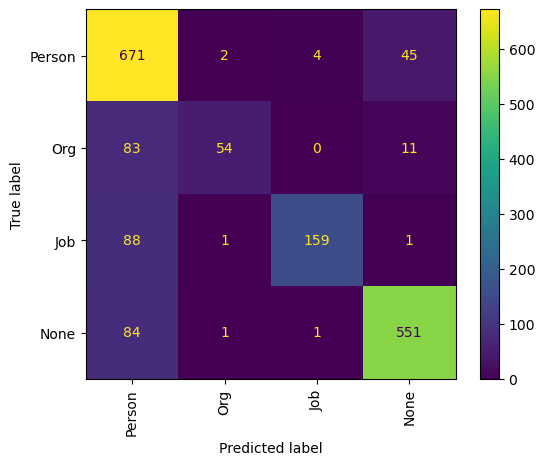


Classification Report:
              precision    recall  f1-score   support

         Job       0.72      0.93      0.81       722
        None       0.93      0.36      0.52       148
         Org       0.97      0.64      0.77       249
      Person       0.91      0.86      0.89       637

    accuracy                           0.82      1756
   macro avg       0.88      0.70      0.75      1756
weighted avg       0.84      0.82      0.81      1756


F1 Score:
[0.81432039 0.52427184 0.76997579 0.88514056]


In [164]:
# Evaluate the model
print("Evaluating model...")
lr.evaluate_model(X_train, y_train, X_test, y_test, fitted_grid)



In [165]:
# Get the feature importances
print("Getting feature importances...")
importances = lr.get_feature_importances(fitted_grid, feature_names = tfidf_df.columns.tolist(), save_directory_path = '/Users/mtaruno/Documents/DevZone/job-research/data/artifacts/importances/{}')

lr.visualize_feature_importances(importances)

Getting feature importances...
